<a href="https://colab.research.google.com/github/kiriyadee/utcc-ai/blob/main/thonburian_whisper_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/biodatlab/thonburian-whisper/blob/main/thonburian_whisper_notebook.ipynb)


# **Thonburian Whisper**

Automatic Speech Recognition (ASR) model for Thai

<img src="https://raw.githubusercontent.com/biodatlab/thonburian-whisper/main/assets/thonburian-whisper-logo.png" width="400"/>
---



> By Crews from Looloo Technology and Mahidol University




## **Install Dependencies** ⚙

In [1]:
!pip install git+https://github.com/huggingface/transformers
!pip install librosa
!sudo apt install ffmpeg
!pip install torchaudio ipywebrtc notebook
!pip install -q gradio
!pip install pytube
!jupyter nbextension enable --py widgetsnbextension

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-a104z5_r
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-a104z5_r
  Resolved https://github.com/huggingface/transformers to commit 3ea3ab62d80d91f9bdd16bd3cacd8133fb0d4566
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.2 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.47.0.dev0-py3-none-any.whl size=10053105 sha256=de07bf5e26b5ab2d8e0690700a9d26475f2802f0b6480e4ae8569619be79b243
  Stored in directory: /tmp/pip-ephem-wheel-cache-6a67gb5_/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully 

## **Load and Set-up Thonburian Whisper 🤗**


In [28]:
import os
import torch
from transformers import pipeline

MODEL_NAME = "biodatlab/whisper-th-medium-combined"
lang = "th"

device = 0 if torch.cuda.is_available() else "cpu"

pipe = pipeline(
    task="automatic-speech-recognition",
    model=MODEL_NAME,
    chunk_length_s=30,
    device=device,
)

Device set to use cuda:0


In [29]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.3 MB/s eta 0:00:00


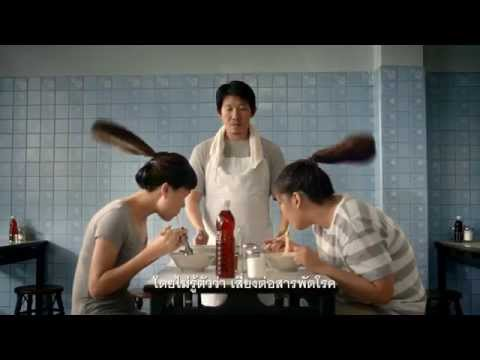

In [30]:
from IPython.display import YouTubeVideo
YOUTUBE_ID = 'fJ59gv_YP6c'
YouTubeVideo(YOUTUBE_ID)

In [33]:
!yt-dlp --extract-audio --audio-format mp3 --output "audio.%(ext)s" https://www.youtube.com/watch\?v\=fJ59gv_YP6c

[youtube] Extracting URL: https://www.youtube.com/watch?v=fJ59gv_YP6c
[youtube] fJ59gv_YP6c: Downloading webpage
[youtube] fJ59gv_YP6c: Downloading ios player API JSON
[youtube] fJ59gv_YP6c: Downloading mweb player API JSON
[youtube] fJ59gv_YP6c: Downloading m3u8 information
[info] fJ59gv_YP6c: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of  455.71KiB in 00:00:00 at 2.02MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio.webm (pass -k to keep)


In [34]:
from transformers import pipeline
import torch
# MODEL_NAME = "biodatlab/whisper-th-medium-timestamp"
MODEL_NAME = "biodatlab/distill-whisper-th-large-v3"
lang = "th"
device = 0 if torch.cuda.is_available() else "cpu"
pipe = pipeline(
    task="automatic-speech-recognition",
    model=MODEL_NAME,
    chunk_length_s=30,
    device=device,
    return_timestamps=True,
)
pipe.model.config.forced_decoder_ids = pipe.tokenizer.get_decoder_prompt_ids(
    language=lang,
    task="transcribe"
)
result = pipe("audio.mp3", return_timestamps=True)
text, timestamps = result["text"], result["chunks"]

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. P

In [35]:
print(text)
print(timestamps)

คนไทย ส่วนใหญ่ ต้อง ปรุง รส จัด ถึง รู้สึก ว่า อร่อยโดย ไม่ รู้ตัว ว่า เสี่ยง ต่อ สารพัด โรคซึ่ง ถ้า เรา ลด การ กิน เค็ม หวาน ลง ก็ คง ทำให้ รู้สึก แบบนี้แต่ หาก ลอง ทำ ติดต่อกัน สาม สัปดาห์ ขึ้นไป ดู ซิ คุณ จะ ค่อย ค่อย รู้สึก ว่าและ ทีนี้ ลอง กลับมา ปรุง รส จัด เหมือนเดิมลดลง ลดลง ลดลอก ค่า And you will feel it And now, you can go back and change your car, as usual The car is in gear [{'timestamp': (0.0, 4.56), 'text': 'คนไทย ส่วนใหญ่ ต้อง ปรุง รส จัด ถึง รู้สึก ว่า อร่อย'}, {'timestamp': (7.56, 10.46), 'text': 'โดย ไม่ รู้ตัว ว่า เสี่ยง ต่อ สารพัด โรค'}, {'timestamp': (11.76, 15.28), 'text': 'ซึ่ง ถ้า เรา ลด การ กิน เค็ม หวาน ลง ก็ คง ทำให้ รู้สึก แบบนี้'}, {'timestamp': (17.32, 21.2), 'text': 'แต่ หาก ลอง ทำ ติดต่อกัน สาม สัปดาห์ ขึ้นไป ดู ซิ คุณ จะ ค่อย ค่อย รู้สึก ว่า'}, {'timestamp': (22.4, 25.04), 'text': 'และ ทีนี้ ลอง กลับมา ปรุง รส จัด เหมือนเดิมลดลง ลดลง ลดลอก ค่า And you will feel it And now, you can go back and change your car, as usual'}, {'timestamp': (27.82, 29.82), 't